# 4. 다중 분류 - SGDClassifier(확률적 경사 하강법을 사용한 분류)

## 4-1. 데이터 준비하기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

ori_data = pd.read_csv('data/02_fish/fish.csv')
data = ori_data.copy()
data.head()

,Species,Weight,Vertical_Length,Diagonal_Length,Cross_Length,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [2]:
# 입력데이터 만들기
input_df = data[['Weight','Vertical_Length','Diagonal_Length','Cross_Length','Height','Width']]
input_df.head()

,Weight,Vertical_Length,Diagonal_Length,Cross_Length,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340


In [3]:
# 입력데이터는 2차원 배열로 만들기
input_data = input_df.to_numpy()
input_data[:5]

array([[242.    ,  23.2   ,  25.4   ,  30.    ,  11.52  ,   4.02  ],
       [290.    ,  24.    ,  26.3   ,  31.2   ,  12.48  ,   4.3056],
       [340.    ,  23.9   ,  26.5   ,  31.1   ,  12.3778,   4.6961],
       [363.    ,  26.3   ,  29.    ,  33.5   ,  12.73  ,   4.4555],
       [430.    ,  26.5   ,  29.    ,  34.    ,  12.444 ,   5.134 ]])

In [4]:
# 타겟데이터는 1차원 배열로 만들기
target_data = data['Species'].to_numpy()
target_data[:5]

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream'], dtype=object)

## 4-2. 데이터 나누기

In [5]:
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트 나누기
train_input, test_input, train_target, test_target = train_test_split(input_data, target_data, stratify=target_data, random_state=42)
train_input.shape, test_input.shape

((119, 6), (40, 6))

## 4-3. 데이터 전처리 - 표준화

In [6]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [7]:
train_scaled[:5]

array([[-0.75628803, -0.64716022, -0.66065677, -0.62357446, -0.78015159,
        -0.45043644],
       [-0.45991057, -0.12483205, -0.1248453 , -0.24414603, -0.4293487 ,
         0.03516919],
       [ 0.07356886, -0.00991985,  0.0212851 ,  0.2165885 ,  0.79541208,
         0.37481797],
       [ 1.54063728,  1.00339682,  1.0441979 ,  1.23743166,  2.29283234,
         1.34130358],
       [-0.87483902, -0.79341211, -0.75807703, -0.82232269, -0.80672937,
        -0.5697143 ]])

## 4-4. 모델 학습 및 평가

In [22]:
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)

C:\Users\myha\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


SGDClassifier(loss='log', max_iter=10, random_state=42)

In [23]:
sc.score(test_scaled, test_target)

0.6

In [24]:
sc.partial_fit(train_scaled, train_target)
sc.score(test_scaled, test_target)

0.7

In [25]:
sc = SGDClassifier(loss='log', random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target)

In [27]:
for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

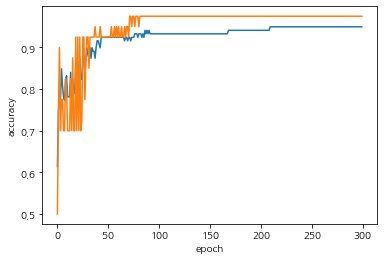

In [28]:
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [29]:
sc = SGDClassifier(loss='log', max_iter=100, random_state=42)
sc.fit(train_scaled, train_target)

SGDClassifier(loss='log', max_iter=100, random_state=42)

In [30]:
sc.score(test_scaled, test_target)

0.925

In [31]:
sc = SGDClassifier(loss='hinge', max_iter=100, random_state=42)
sc.fit(train_scaled, train_target)

SGDClassifier(max_iter=100, random_state=42)

In [32]:
sc.score(test_scaled, test_target)

0.825